# The Encoder–Decoder Architecture

The Encoder-Decoder architecture, also known as the `Seq2Seq` (Sequence-to-Sequence) model, is a deep learning architecture primarily used in natural language processing and other sequence-to-sequence tasks. It consists of two main components: an encoder and a decoder. This architecture is widely used for tasks like machine translation, text summarization, speech recognition, and more. Here's a detailed explanation of the Encoder-Decoder architecture:

**1. Encoder:**
The encoder is the first component of the architecture, and its main role is to process the input sequence and convert it into a fixed-size context or latent representation. The input sequence can be a sentence in one language (in the case of machine translation) or any sequence of data (e.g., an audio waveform in the case of speech recognition).

**Key components of the encoder:**
- **Recurrent Neural Networks (RNNs) or Long Short-Term Memory (LSTM) cells:** In the early implementations of the Encoder-Decoder architecture, RNNs and LSTMs were commonly used in the encoder. These networks process the input sequence one element at a time, updating their hidden states at each time step.

- **Bidirectional RNNs:** To capture contextual information from both past and future elements in the input sequence, bidirectional RNNs can be employed. This means using two separate RNNs: one processing the sequence from left to right and the other from right to left.

- **Convolutional Neural Networks (CNNs):** In some cases, especially for image captioning or speech recognition, CNNs are used in the encoder to capture spatial features from the input data.

- **Transformers:** In recent years, Transformer-based architectures like the BERT model have gained popularity as encoders. Transformers use self-attention mechanisms to capture dependencies between different elements in the input sequence.

The encoder's output, often referred to as the "context" or "thought vector," contains valuable information about the input sequence and is used as the initial state for the decoder.

**2. Decoder:**
The decoder is the second component of the architecture, and it takes the context produced by the encoder and generates an output sequence. The output sequence can be in a different language (in machine translation) or have a different format (e.g., text summarization).

**Key components of the decoder:**
- **RNNs or LSTMs:** Similar to the encoder, RNNs or LSTMs can be used in the decoder to generate the output sequence one element at a time. The context from the encoder serves as the initial state of the decoder.

- **Attention Mechanisms:** Attention mechanisms, such as the one used in the Transformer architecture, have become crucial in the decoder. They allow the decoder to focus on different parts of the input sequence when generating each element of the output sequence, enabling better results for long sequences.

**Training:**
The Encoder-Decoder model is trained using paired input and output sequences. During training, the model learns to align the input sequence with the corresponding output sequence. The training objective is typically to minimize the difference between the predicted output and the target output.

**Inference:**
During inference, the model takes an input sequence, processes it through the encoder to obtain the context, and then uses the decoder to generate the output sequence step by step.

The Encoder-Decoder architecture has been highly successful in various sequence-to-sequence tasks and is the foundation for many state-of-the-art models in natural language processing and beyond. Its ability to capture and generate sequences has led to its widespread adoption in the field of deep learning.

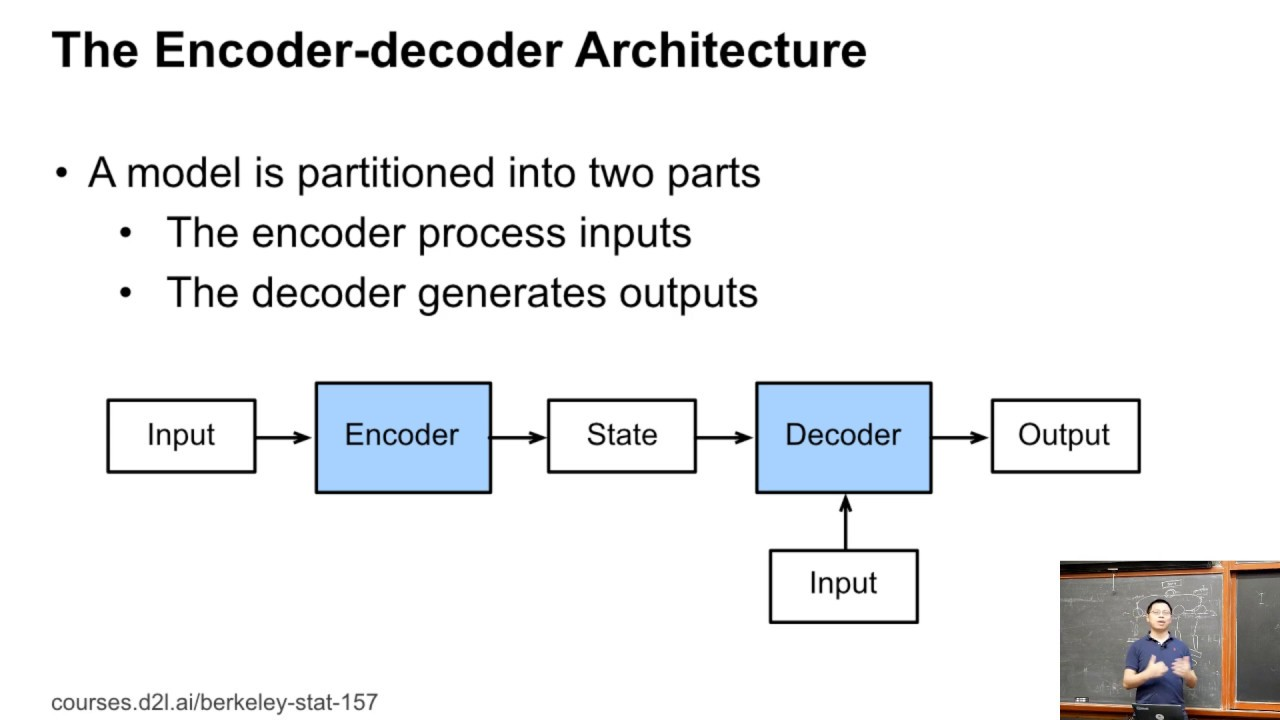

In [5]:
from PIL import Image
from IPython.display import display

img=Image.open('Data/eda.jpg')
img=img.convert('RGB')
display(img)

# Implementation

In [7]:
import tensorflow as tf
from d2l import tensorflow as d2l
import warnings
warnings.filterwarnings('ignore')

## Encoder
In the encoder interface, we just specify that the encoder takes variable-length sequences as input X. The implementation will be provided by any model that inherits this base Encoder class.

In [8]:
class Encoder(tf.keras.layers.Layer):  #@save
    """The base encoder interface for the encoder--decoder architecture."""
    def __init__(self):
        super().__init__()

    # Later there can be additional arguments (e.g., length excluding padding)
    def call(self, X, *args):
        raise NotImplementedError

##  Decoder
In the following decoder interface, we add an additional init_state method to convert the encoder output (enc_all_outputs) into the encoded state. Note that this step may require extra inputs, such as the valid length of the input To generate a variable-length sequence token by token, every time the decoder may map an input (e.g., the generated token at the previous time step) and the encoded state into an output token at the current time step.

In [9]:
class Decoder(tf.keras.layers.Layer):  #@save
    """The base decoder interface for the encoder--decoder architecture."""
    def __init__(self):
        super().__init__()

    # Later there can be additional arguments (e.g., length excluding padding)
    def init_state(self, enc_all_outputs, *args):
        raise NotImplementedError

    def call(self, X, state):
        raise NotImplementedError

## Putting the Encoder and Decoder Together
In the forward propagation, the output of the encoder is used to produce the encoded state, and this state will be further used by the decoder as one of its input.

In [10]:
class EncoderDecoder(d2l.Classifier):  #@save
    """The base class for the encoder--decoder architecture."""
    def __init__(self, encoder, decoder):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder

    def call(self, enc_X, dec_X, *args):
        enc_all_outputs = self.encoder(enc_X, *args, training=True)
        dec_state = self.decoder.init_state(enc_all_outputs, *args)
        # Return decoder output only
        return self.decoder(dec_X, dec_state, training=True)[0]

# Thank You!